Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1),

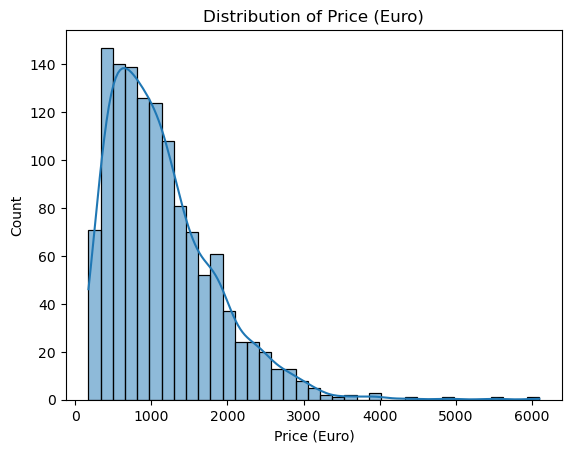

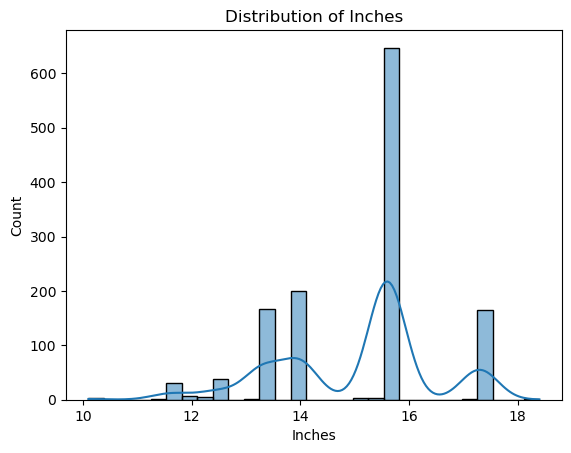

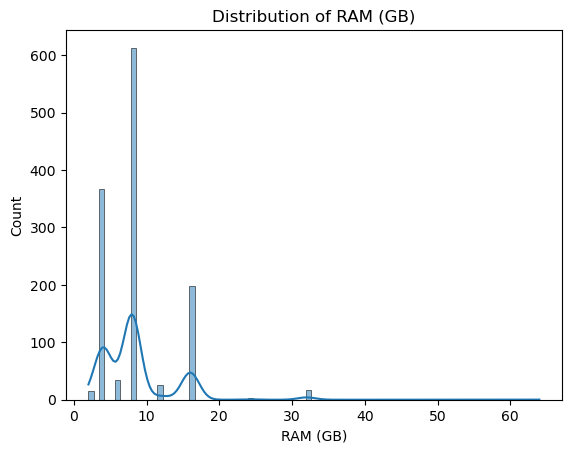

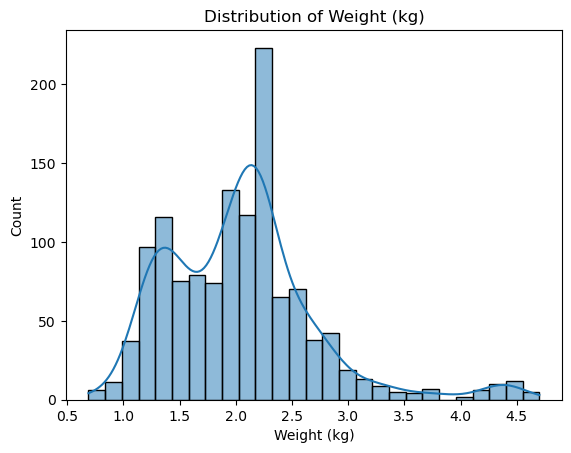

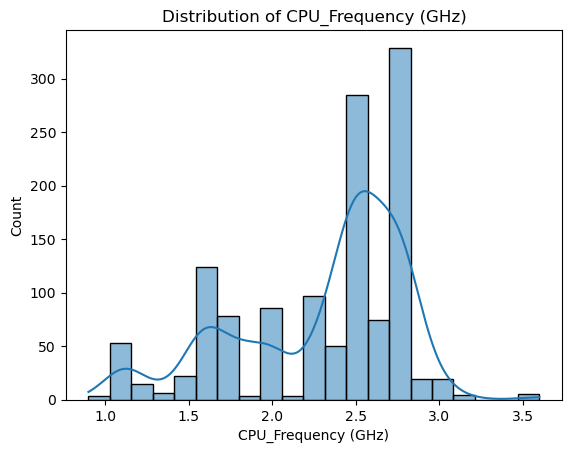


Frequency Distribution for Company:
Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


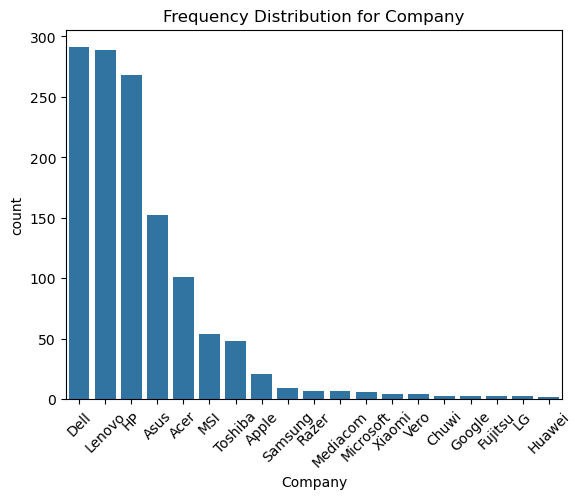


Frequency Distribution for TypeName:
TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64


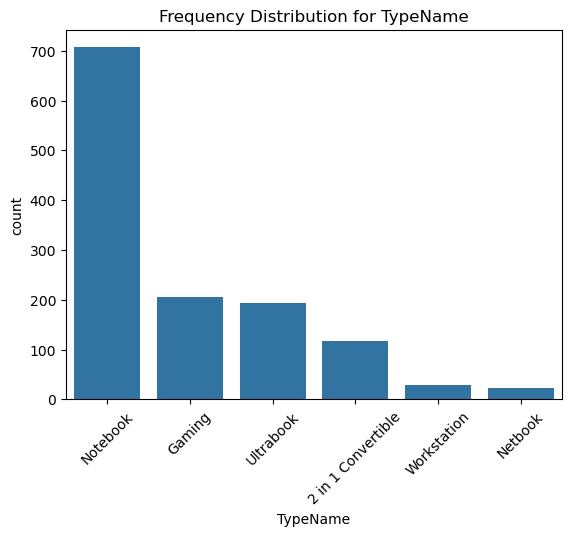


Frequency Distribution for CPU_Company:
CPU_Company
Intel      1214
AMD          60
Samsung       1
Name: count, dtype: int64


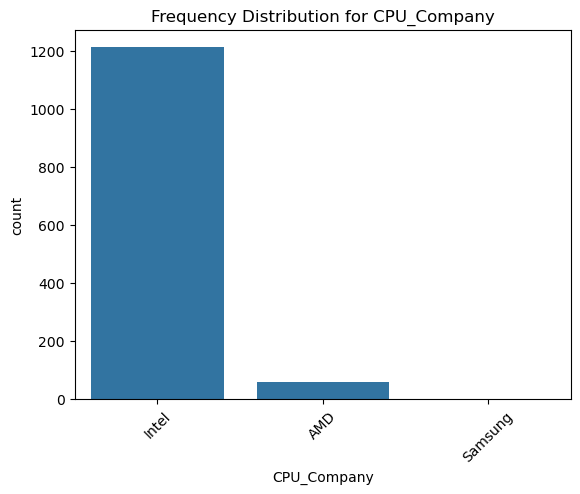

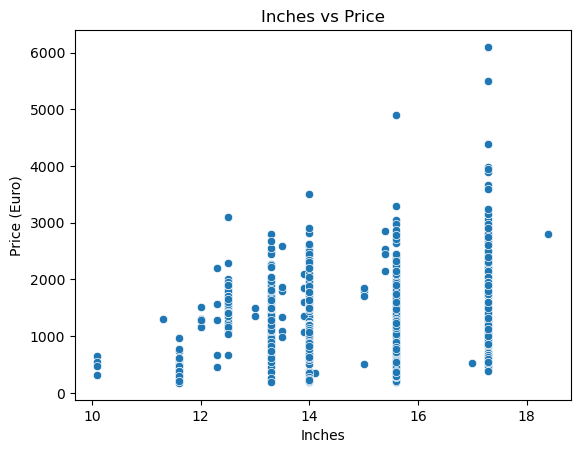

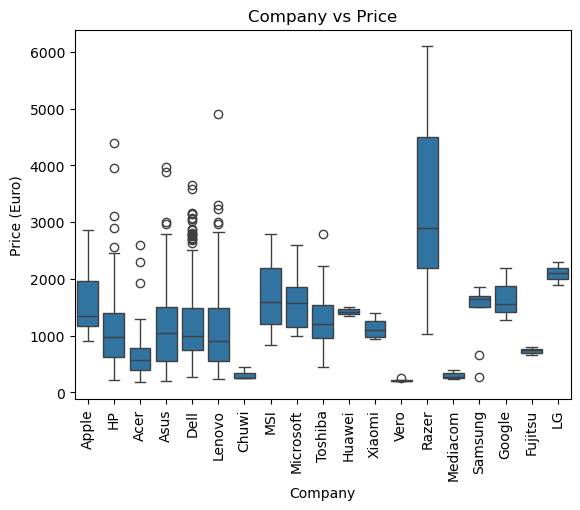

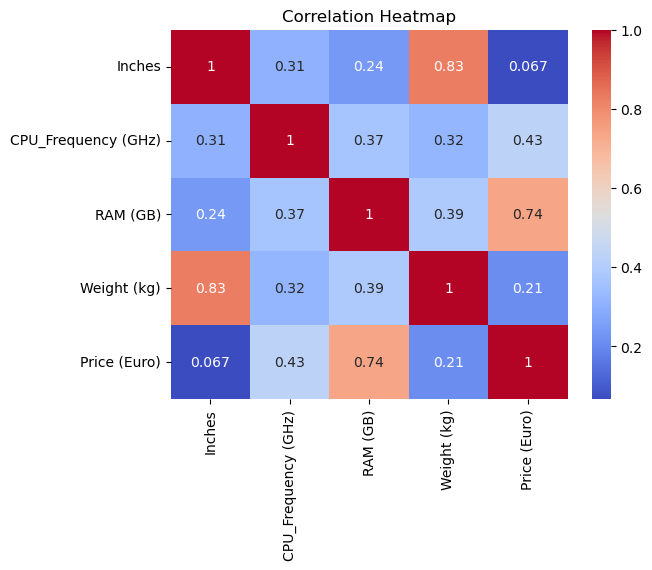

Linear Regression: MSE = 89937.57, R² = 0.82
Decision Tree: MSE = 108720.91, R² = 0.78
Random Forest: MSE = 64287.93, R² = 0.87
Gradient Boosting: MSE = 66701.28, R² = 0.87

Best Model Parameters: {'model__max_depth': None, 'model__n_estimators': 200}
Final MSE: 62637.715499313366
Final R²: 0.8738006063931436


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1: Data Ingestion
# Load the dataset
dataset_path = "C:/Users/AMIT/Desktop/laptop_price - dataset.csv" 
df = pd.read_csv(dataset_path)

# Inspect the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values and duplicates
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicates:")
print(df.duplicated().sum())

# Part 2: Data Understanding and EDA
# Univariate Analysis
numerical_columns = ['Price (Euro)', 'Inches', 'RAM (GB)', 'Weight (kg)', 'CPU_Frequency (GHz)']
print("\nNumerical Features Description:")
print(df[numerical_columns].describe())

# Plot distributions
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical frequency distribution
categorical_columns = ['Company', 'TypeName', 'CPU_Company']
for col in categorical_columns:
    print(f"\nFrequency Distribution for {col}:\n{df[col].value_counts()}")
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Frequency Distribution for {col}")
    plt.show()

# Bivariate Analysis
sns.scatterplot(x='Inches', y='Price (Euro)', data=df)
plt.title("Inches vs Price")
plt.show()

sns.boxplot(x='Company', y='Price (Euro)', data=df)
plt.title("Company vs Price")
plt.xticks(rotation=90)
plt.show()

# Multivariate Analysis
# Multivariate Analysis - Correlation Heatmap
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for numerical features only
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Part 3: Data Cleaning
# Handle missing values
df = df.drop_duplicates()
# Convert 'Weight (kg)' to string, remove 'kg', and convert back to float
if 'Weight (kg)' in df.columns:
    df['Weight (kg)'] = df['Weight (kg)'].astype(str).str.replace('kg', '').astype(float)

# Part 4: Data Preprocessing
# Splitting features and target
X = df.drop('Price (Euro)', axis=1)
y = df['Price (Euro)']

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Define preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Part 5: Model Building and Evaluation
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R² = {metrics['R²']:.2f}")

# Hyperparameter tuning for the best model
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [10, 20, None]
}
grid_search = GridSearchCV(
    Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    param_grid,
    cv=5,
    scoring='r2'
)
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
final_pred = best_model.predict(X_test)
print("\nBest Model Parameters:", grid_search.best_params_)
print("Final MSE:", mean_squared_error(y_test, final_pred))
print("Final R²:", r2_score(y_test, final_pred))
